In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [ ]:
import torch

# CUDA(GPU) 사용 가능 여부 확인
if torch.cuda.is_available():
    device = torch.device("cuda")
    print("GPU is available")
else:
    device = torch.device("cpu")
    print("GPU not available, using CPU")


GPU is available


In [ ]:
import os
import librosa
import matplotlib.pyplot as plt
import librosa.display
import numpy as np
import random

In [ ]:
root_dir='/content/drive/MyDrive/Capstone_Project/DCASE_challenge/dev_data/fan/'
train_data_path = '/content/drive/MyDrive/Capstone_Project/DCASE_challenge/fan/train'
test_data_path = '/content/drive/MyDrive/Capstone_Project/DCASE_challenge/fan/test'
machine_ids = ['machine_id_00', 'machine_id_02', 'machine_id_04', 'machine_id_06']

In [ ]:
# # 훈련 데이터와 테스트 데이터 경로 설정
# train_data_path = '/content/drive/MyDrive/Capstone_Project/DCASE_challenge/fan/train'
# test_data_path = '/content/drive/MyDrive/Capstone_Project/DCASE_challenge/fan/test'

# # 훈련 데이터 파일 목록 가져오기
# train_files = [os.path.join(train_data_path, file) for file in os.listdir(train_data_path)]
# print(len(train_files))

# # 테스트 데이터 파일 목록 가져오기
# test_files = [os.path.join(test_data_path, file) for file in os.listdir(test_data_path)]
# print(len(test_files))


3675
1875


In [ ]:
# import os
# import shutil

# # 원본 파일이 있는 디렉토리
# train_data_path = '/content/drive/MyDrive/Capstone_Project/DCASE_challenge/fan/train'

# # 분류할 machine_id별 디렉토리 생성
# machine_ids = ['machine_id_00', 'machine_id_02', 'machine_id_04', 'machine_id_06']
# for machine_id in machine_ids:
#     os.makedirs(os.path.join(train_data_path, machine_id), exist_ok=True)

# # 파일 분류 및 이동
# for file in os.listdir(train_data_path):
#     if file.startswith('normal_id_00'):
#         shutil.move(os.path.join(train_data_path, file), os.path.join(train_data_path, 'machine_id_00', file))
#     elif file.startswith('normal_id_02'):
#         shutil.move(os.path.join(train_data_path, file), os.path.join(train_data_path, 'machine_id_02', file))
#     elif file.startswith('normal_id_04'):
#         shutil.move(os.path.join(train_data_path, file), os.path.join(train_data_path, 'machine_id_04', file))
#     elif file.startswith('normal_id_06'):
#         shutil.move(os.path.join(train_data_path, file), os.path.join(train_data_path, 'machine_id_06', file))

# # 각 디렉토리의 파일 수 계산 및 출력
# for machine_id in machine_ids:
#     directory = os.path.join(train_data_path, machine_id)
#     file_count = len(os.listdir(directory))
#     print(f"{machine_id} 디렉토리에 있는 파일 수: {file_count}")


machine_id_00 디렉토리에 있는 파일 수: 911
machine_id_02 디렉토리에 있는 파일 수: 916
machine_id_04 디렉토리에 있는 파일 수: 933
machine_id_06 디렉토리에 있는 파일 수: 915


In [ ]:
# # 백업을 위한 기본 경로 설정
# backup_base_directory = '/content/drive/MyDrive/Capstone_Project/DCASE_challenge/fan/backup'

# # 각 machine_id 디렉토리에 대한 백업
# for machine_id in machine_ids:
#     source_directory = os.path.join(train_data_path, machine_id)
#     backup_directory = os.path.join(backup_base_directory, machine_id)

#     # 백업 디렉토리 생성
#     os.makedirs(backup_directory, exist_ok=True)

#     # 파일 복사
#     for file_name in os.listdir(source_directory):
#         source_file_path = os.path.join(source_directory, file_name)
#         backup_file_path = os.path.join(backup_directory, file_name)
#         shutil.copy(source_file_path, backup_file_path)

#     print(f"{machine_id} 디렉토리 백업 완료!")


machine_id_00 디렉토리 백업 완료!
machine_id_02 디렉토리 백업 완료!
machine_id_04 디렉토리 백업 완료!
machine_id_06 디렉토리 백업 완료!


In [ ]:
# # 각 machine_id 디렉토리 내에 train 하위 디렉토리 생성 및 파일 이동
# for machine_id in machine_ids:
#     # train 디렉토리 생성
#     train_directory = os.path.join(train_data_path, machine_id, 'train')
#     os.makedirs(train_directory, exist_ok=True)

#     # 기존 파일을 train 디렉토리로 이동
#     machine_id_directory = os.path.join(train_data_path, machine_id)
#     for file in os.listdir(machine_id_directory):
#         # train 디렉토리는 제외
#         if file != 'train':
#             shutil.move(os.path.join(machine_id_directory, file), os.path.join(train_directory, file))

#     # 이동 후 파일 수 확인 및 출력
#     file_count = len(os.listdir(train_directory))
#     print(f"{machine_id}/train 디렉토리에 있는 파일 수: {file_count}")


machine_id_00/train 디렉토리에 있는 파일 수: 911
machine_id_02/train 디렉토리에 있는 파일 수: 916
machine_id_04/train 디렉토리에 있는 파일 수: 933
machine_id_06/train 디렉토리에 있는 파일 수: 915


In [ ]:
# import os
# import random
# import shutil

# random.seed(2023)

# # 기존 트레이닝 데이터 디렉토리 경로
# train_data_path = '/content/drive/MyDrive/Capstone_Project/DCASE_challenge/fan/train'

# # 테스트 데이터 경로
# test_data_path = '/content/drive/MyDrive/Capstone_Project/DCASE_challenge/fan/test'

# # machine_id_xx 값을 포함하는 리스트
# machine_ids = ['machine_id_00', 'machine_id_02', 'machine_id_04', 'machine_id_06']

# # 각 machine_id_xx 디렉토리 내에 test 디렉토리 생성 및 파일 이동
# for machine_id in machine_ids:
#     test_directory = os.path.join(train_data_path, machine_id, 'test')
#     os.makedirs(test_directory, exist_ok=True)

#     # normal_id_xx 파일 이동
#     normal_files = [f for f in os.listdir(test_data_path) if f.startswith(f'normal_id_{machine_id[-2:]}')]
#     for file in normal_files:  # 첫 100개 파일만 선택
#         shutil.copy(os.path.join(test_data_path, file), os.path.join(test_directory, file))

#     # anomaly_id_xx 파일 랜덤 선택 및 이동
#     anomaly_files = [f for f in os.listdir(test_data_path) if f.startswith(f'anomaly_id_{machine_id[-2:]}')]
#     random.shuffle(anomaly_files)  # 무작위로 섞기
#     for file in anomaly_files[:20]:  # 첫 20개 파일만 선택
#         shutil.copy(os.path.join(test_data_path, file), os.path.join(test_directory, file))

#     print(f"{machine_id}/test 디렉토리 구성 완료!")

# # 각 machine_id_xx/test 디렉토리에 있는 파일 수 출력
# for machine_id in machine_ids:
#     test_directory = os.path.join(train_data_path, machine_id, 'test')
#     file_count = len(os.listdir(test_directory))
#     print(f"{machine_id}/test 디렉토리에 있는 파일 수: {file_count}")






machine_id_00/test 디렉토리 구성 완료!
machine_id_02/test 디렉토리 구성 완료!
machine_id_04/test 디렉토리 구성 완료!
machine_id_06/test 디렉토리 구성 완료!
machine_id_00/test 디렉토리에 있는 파일 수: 120
machine_id_02/test 디렉토리에 있는 파일 수: 120
machine_id_04/test 디렉토리에 있는 파일 수: 120
machine_id_06/test 디렉토리에 있는 파일 수: 120


In [ ]:
import os
import matplotlib.pyplot as plt
import librosa
import librosa.display

def plot_spectrogram(file_path, ax, title):
    # 오디오 파일 로드
    y, sr = librosa.load(file_path, sr=None)

    # Mel-spectrogram 계산
    S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
    log_S = librosa.power_to_db(S, ref=np.max)

    # 스펙트로그램 시각화
    librosa.display.specshow(log_S, sr=sr, x_axis='time', y_axis='mel', ax=ax)
    ax.set_title(title)
    ax.figure.colorbar(mappable=ax.images[0], ax=ax, format='%+02.0f dB')




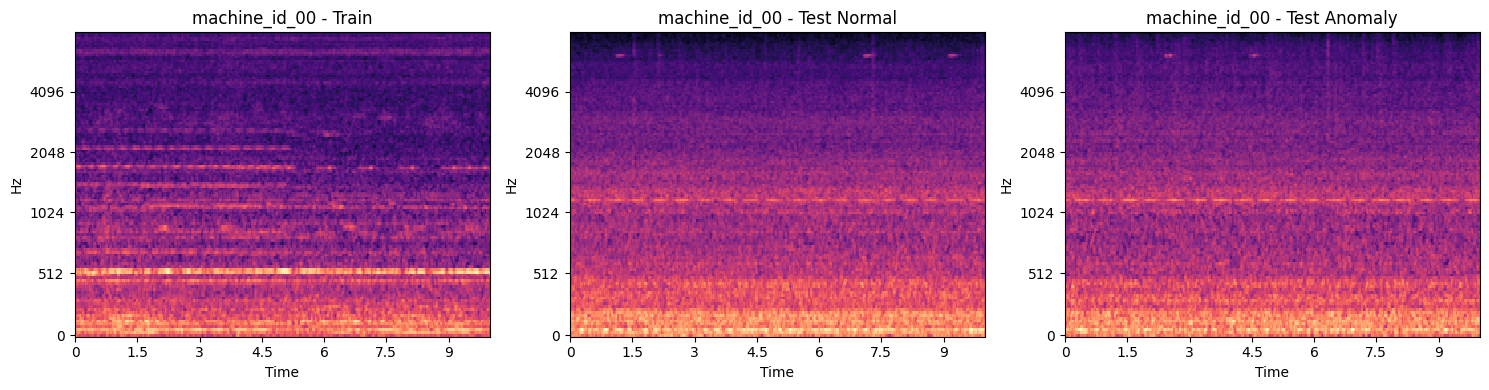

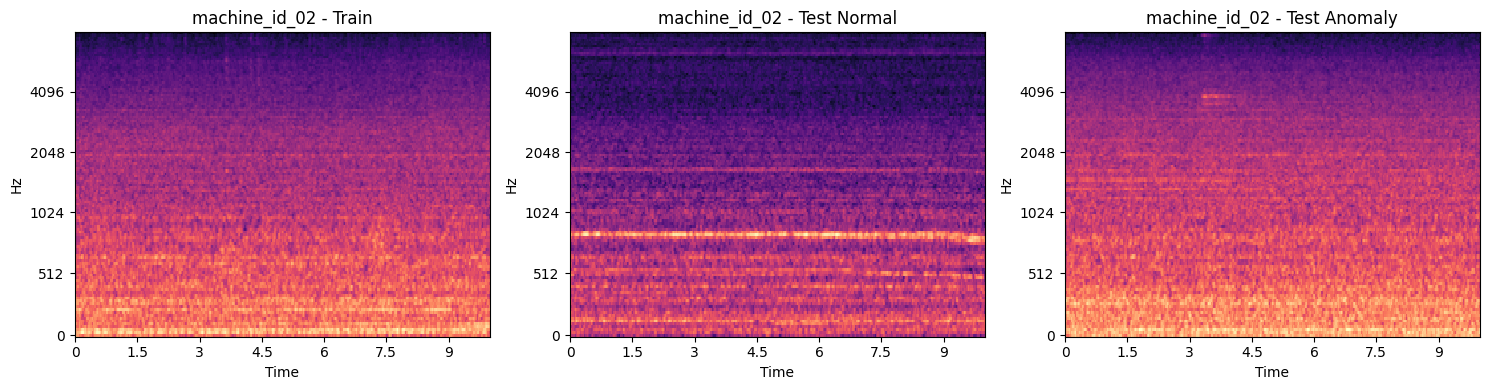

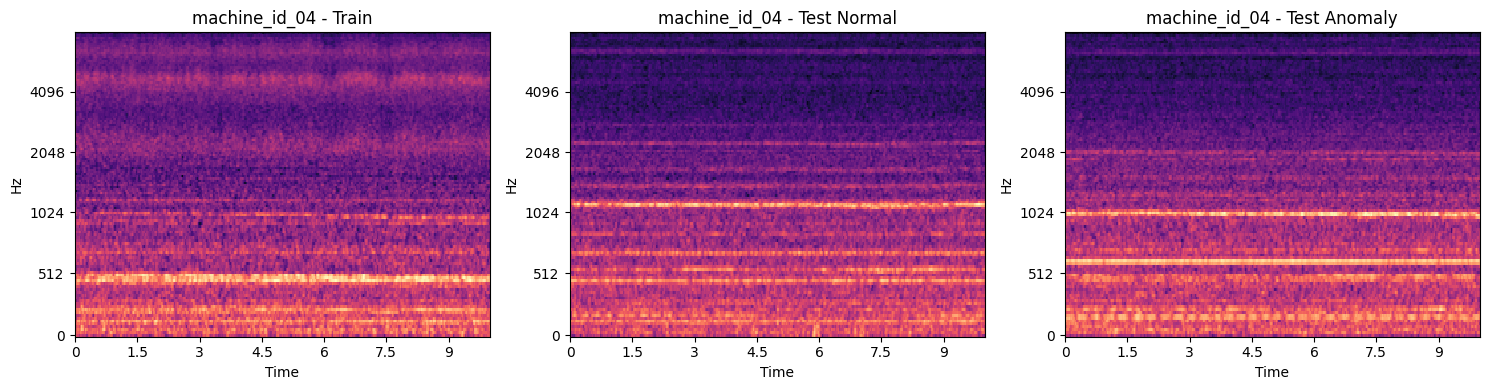

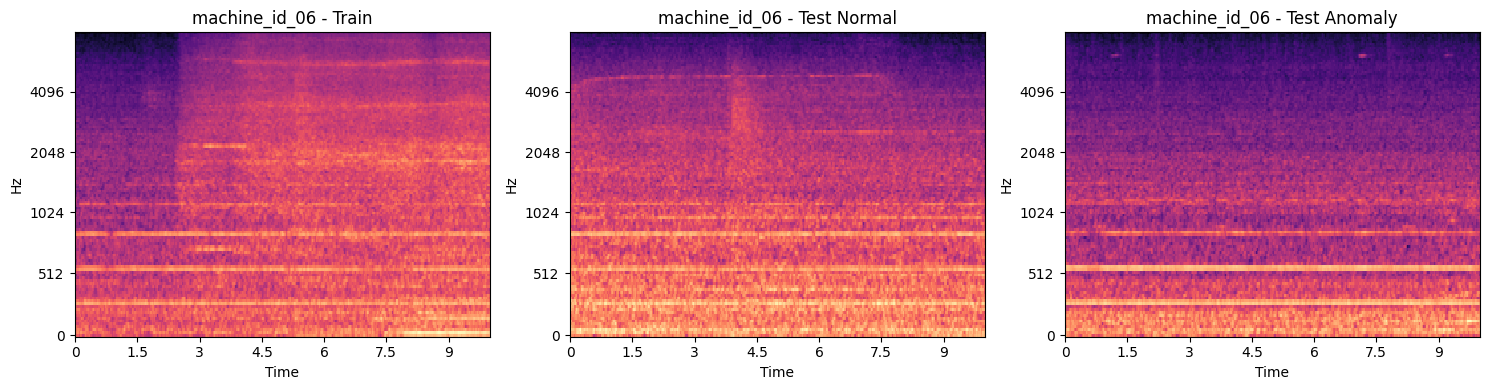

In [ ]:
# for machine_id in machine_ids:
#     # Train, Test (Normal), Test (Anomaly) 파일 리스트를 가져옴
#     train_files = os.listdir(os.path.join(train_data_path, machine_id, 'train'))
#     test_files = os.listdir(os.path.join(train_data_path, machine_id, 'test'))

#     # 'normal'과 'anomaly'가 포함된 파일을 찾아서 각각의 경로를 설정
#     normal_file = next((f for f in test_files if 'normal' in f), None)
#     anomaly_file = next((f for f in test_files if 'anomaly' in f), None)

#     # 파일이 실제로 존재하는지 확인
#     if normal_file and anomaly_file:
#         normal_file_path = os.path.join(train_data_path, machine_id, 'test', normal_file)
#         anomaly_file_path = os.path.join(train_data_path, machine_id, 'test', anomaly_file)

#         if not os.path.isfile(normal_file_path):
#             raise FileNotFoundError(f"The file {normal_file_path} does not exist.")
#         if not os.path.isfile(anomaly_file_path):
#             raise FileNotFoundError(f"The file {anomaly_file_path} does not exist.")

#         # 스펙트로그램 그리기
#         fig, axes = plt.subplots(1, 3, figsize=(15, 4))  # 3개의 서브플롯 생성

#         # 첫 번째 스펙트로그램 (Train)
#         train_file_path = os.path.join(train_data_path, machine_id, 'train', train_files[0])
#         if os.path.isfile(train_file_path):
#             plot_spectrogram(train_file_path, axes[0], f'{machine_id} - Train')
#         else:
#             raise FileNotFoundError(f"The file {train_file_path} does not exist.")

#         # 두 번째 스펙트로그램 (Test Normal)
#         plot_spectrogram(normal_file_path, axes[1], f'{machine_id} - Test Normal')

#         # 세 번째 스펙트로그램 (Test Anomaly)
#         plot_spectrogram(anomaly_file_path, axes[2], f'{machine_id} - Test Anomaly')

#         plt.tight_layout()  # 플롯 간격 조정
#         plt.show()  # 플롯 표시
#     else:
#         # 필요한 파일이 없으면 에러 메시지 출력
#         print(f"Missing files for {machine_id}. Check the dataset.")


In [ ]:
# import numpy as np
# import librosa
# import os

# # 첫 번째 훈련 파일의 경로 설정
# train_file_path = os.path.join(train_data_path, machine_id, 'train', train_files[0])

# # 오디오 파일 로드
# y, sr = librosa.load(train_file_path, sr=None)

# # 스펙트로그램 생성
# S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
# log_S = librosa.power_to_db(S, ref=np.max)

# # 스펙트로그램의 최소값과 최대값 확인
# min_val = np.min(log_S)
# max_val = np.max(log_S)

# print(f'Minimum value in spectrogram: {min_val}')
# print(f'Maximum value in spectrogram: {max_val}')



Minimum value in spectrogram: -58.763916015625
Maximum value in spectrogram: 0.0


Min: -58.763916015625, Max: 0.0, Mean: -27.220516204833984, Std: 8.23589038848877


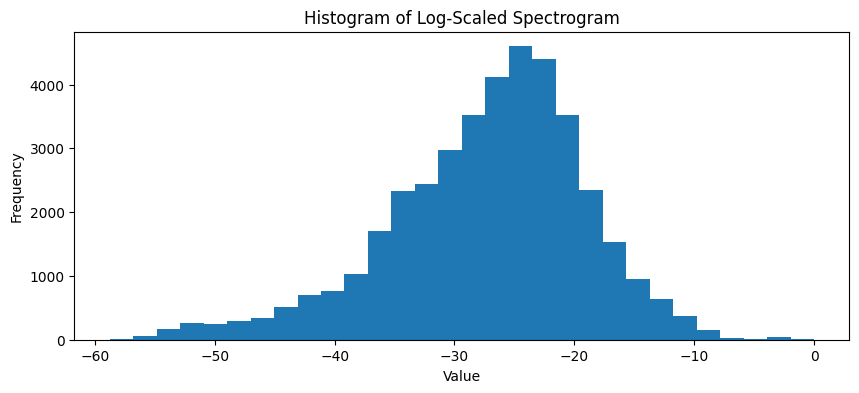

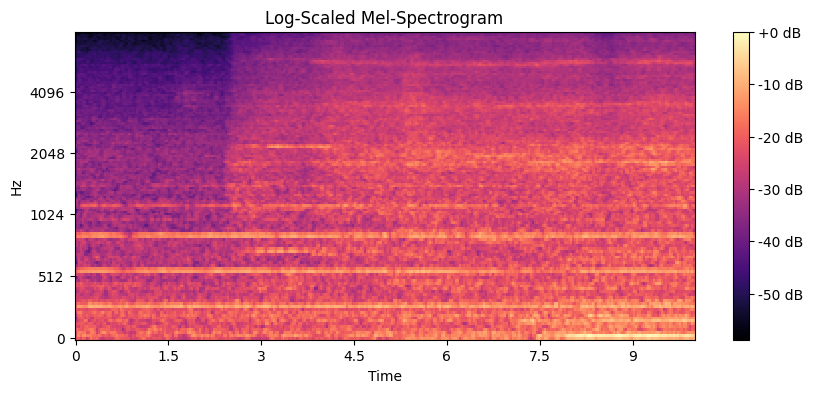

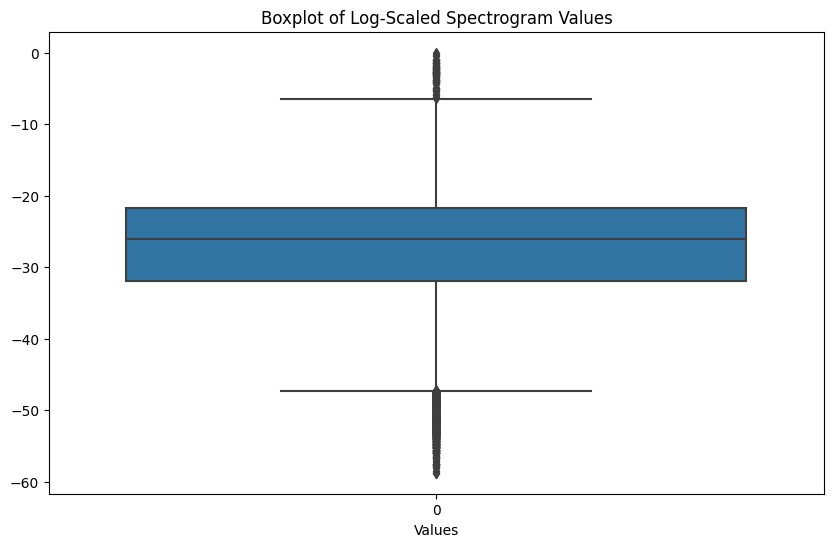

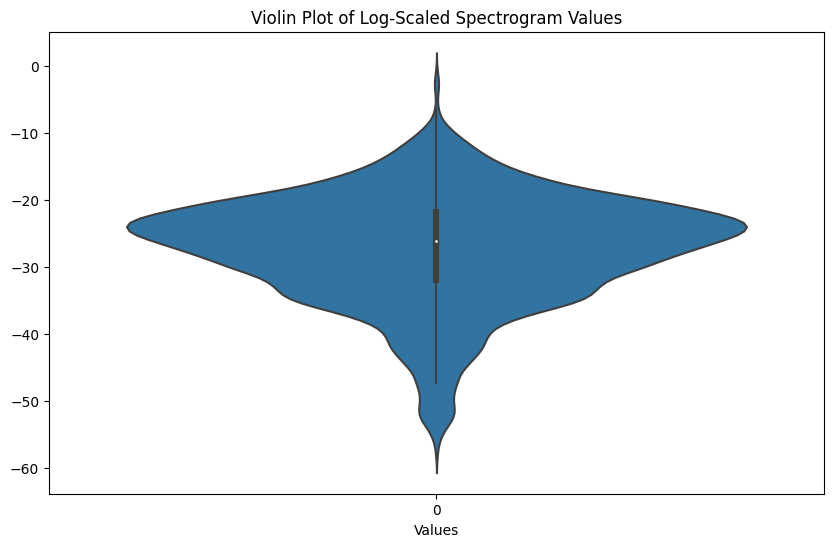

In [ ]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# # 데이터 로드 및 스펙트로그램 계산
# y, sr = librosa.load(train_file_path, sr=None)
# S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
# log_S = librosa.power_to_db(S, ref=np.max)

# # 통계 분석
# min_val, max_val = np.min(log_S), np.max(log_S)
# mean_val, std_val = np.mean(log_S), np.std(log_S)
# print(f"Min: {min_val}, Max: {max_val}, Mean: {mean_val}, Std: {std_val}")

# # 히스토그램
# plt.figure(figsize=(10, 4))
# plt.hist(log_S.flatten(), bins=30)
# plt.title("Histogram of Log-Scaled Spectrogram")
# plt.xlabel("Value")
# plt.ylabel("Frequency")
# plt.show()

# # 스펙트로그램 시각화
# plt.figure(figsize=(10, 4))
# librosa.display.specshow(log_S, sr=sr, x_axis='time', y_axis='mel')
# plt.title("Log-Scaled Mel-Spectrogram")
# plt.colorbar(format='%+02.0f dB')
# plt.show()

# flattened_log_S = log_S.flatten()

# plt.figure(figsize=(10, 6))
# sns.boxplot(data=flattened_log_S)
# plt.title('Boxplot of Log-Scaled Spectrogram Values')
# plt.xlabel('Values')
# plt.show()

# # 바이올린 플롯 그리기
# plt.figure(figsize=(10, 6))
# sns.violinplot(data=flattened_log_S)
# plt.title('Violin Plot of Log-Scaled Spectrogram Values')
# plt.xlabel('Values')
# plt.show()

In [ ]:

import torch

from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split

In [ ]:
class AudioDataset(Dataset):
    def __init__(self, file_paths, min_val=None, max_val=None, alpha=1.0):
        self.file_paths = file_paths
        self.min_val = min_val
        self.max_val = max_val
        self.alpha = alpha

        # min_val과 max_val이 제공되지 않았을 경우, 전체 데이터셋에서 계산하도록 구현할 수 있습니다.
        if self.min_val is None or self.max_val is None:
            self.min_val, self.max_val = self.calculate_min_max_values()

    def __len__(self):
        return len(self.file_paths)

    def calculate_min_max_values(self):
        # 스펙트로그램의 최소값과 최대값을 계산합니다.
        all_values = []
        for file_path in self.file_paths:
            y, sr = librosa.load(file_path, sr=None)
            S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
            log_S = librosa.power_to_db(S, ref=np.max)
            all_values.append(log_S.flatten())

        all_values = np.concatenate(all_values)
        min_val = all_values.min()
        max_val = all_values.max()
        return min_val, max_val

    def __getitem__(self, idx):
      # 첫 번째 오디오 파일 로드 및 처리
      file_path1 = self.file_paths[idx]
      x1 = self.process_file(file_path1)

      # 두 번째 오디오 파일 로드 및 처리 (데이터 증강을 위한 mixup)
      file_path2 = np.random.choice(self.file_paths)
      x2 = self.process_file(file_path2)

      # mixup 파라미터 생성
      lam = np.random.beta(self.alpha, self.alpha) if self.alpha > 0 else 1

      # 두 오디오 파일의 스펙트로그램을 섞음
      mixed_x = lam * x1 + (1 - lam) * x2
      return mixed_x


    def process_file(self, file_path):
        # 오디오 파일 로드 및 스펙트로그램 생성
        y, sr = librosa.load(file_path, sr=None)
        S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
        log_S = librosa.power_to_db(S, ref=np.max)

        # 정규화
        normalized_log_S = (log_S - self.min_val) / (self.max_val - self.min_val)

        # PyTorch Tensor로 변환
        normalized_log_S_tensor = torch.tensor(normalized_log_S, dtype=torch.float32)
        return normalized_log_S_tensor


In [ ]:
# import os
# from sklearn.model_selection import train_test_split

# # 각 machine_id별로 처리
# for machine_id in machine_ids:
#     # 해당 machine_id의 train 파일 경로 수집
#     train_files = [os.path.join(train_data_path, machine_id, 'train', file)
#                    for file in os.listdir(os.path.join(train_data_path, machine_id, 'train'))]

#     # 해당 machine_id의 train 데이터셋에서 min_val과 max_val 계산
#     temp_dataset = AudioDataset(train_files)
#     min_val, max_val = temp_dataset.calculate_min_max_values()

#     # 데이터셋 분할
#     train_files, val_files = train_test_split(train_files, test_size=0.2, random_state=2023)

#     # 데이터셋 인스턴스 생성
#     train_dataset = AudioDataset(train_files, min_val, max_val)
#     val_dataset = AudioDataset(val_files, min_val, max_val)

#     # DataLoader 인스턴스 생성
#     train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
#     val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

#     # 여기서 모델 트레이닝 및 검증 로직 추가


In [ ]:


# 조기 종료
class EarlyStopping:
    def __init__(self, patience=15, verbose=False, delta=0):
        self.patience = patience
        self.verbose = verbose
        self.delta = delta
        self.best_score = None
        self.early_stop = False
        self.counter = 0
        self.val_loss_min = float('inf')

    def __call__(self, val_loss, model):
        score = -val_loss

        if self.best_score is None:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
        elif score < self.best_score + self.delta:
            self.counter += 1
            if self.verbose:
                print(f'EarlyStopping counter: {self.counter} out of {self.patience}')
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
            self.counter = 0

    def save_checkpoint(self, val_loss, model):
        '''Saves model when validation loss decrease.'''
        if self.verbose:
            print(f'Validation loss decreased ({self.val_loss_min:.6f} --> {val_loss:.6f}).  Saving model ...')
        torch.save(model.state_dict(), 'checkpoint.pt')
        self.val_loss_min = val_loss

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F


In [ ]:
class Autoencoder(nn.Module):
    def __init__(self, dropout_prob=0.3):
        super(Autoencoder, self).__init__()
        # 인코더
        self.encoder = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(16),
            nn.MaxPool2d(2, 2),
            nn.Dropout(dropout_prob),

            nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(32),
            nn.MaxPool2d(2, 2),
            nn.Dropout(dropout_prob),

            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(64),
            nn.MaxPool2d(2, 2),
            nn.Dropout(dropout_prob),

            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(128),
            nn.MaxPool2d(2, 2),
            nn.Dropout(dropout_prob)
        )

        # 디코더
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(128, 64, kernel_size=2, stride=2),
            nn.ReLU(),
            nn.BatchNorm2d(64),
            nn.Dropout(dropout_prob),

            nn.ConvTranspose2d(64, 32, kernel_size=2, stride=2),
            nn.ReLU(),
            nn.BatchNorm2d(32),
            nn.Dropout(dropout_prob),

            nn.ConvTranspose2d(32, 16, kernel_size=2, stride=2),
            nn.ReLU(),
            nn.BatchNorm2d(16),
            nn.Dropout(dropout_prob),

            nn.ConvTranspose2d(16, 1, kernel_size=2, stride=2, output_padding=1),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        target_height, target_width = 128, 313  # 예상되는 목표 크기
        x = F.interpolate(x, size=(target_height, target_width), mode='bilinear', align_corners=False)


        return x


In [ ]:
from tqdm import tqdm

# 모델 훈련 함수
def train_model(model, train_loader, val_loader, machine_id, n_epochs=50):
    early_stopping = EarlyStopping(patience=15, verbose=True)

    optimizer = optim.Adam(model.parameters(), lr=0.001)
    criterion = nn.MSELoss()

    train_losses = []
    val_losses = []

    for epoch in range(n_epochs):
        model.train()
        running_loss = 0.0
        for mixed_x in tqdm(train_loader, desc=f"Epoch {epoch+1} Training"):
            mixed_x = mixed_x.unsqueeze(1).to(device)
            optimizer.zero_grad()
            outputs = model(mixed_x)
            loss = criterion(outputs, mixed_x)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

        train_losses.append(running_loss / len(train_loader))

        model.eval()
        val_loss = 0.0
        with torch.no_grad():
          for mixed_x in tqdm(val_loader, desc=f"Epoch {epoch+1} Validation"):
              mixed_x = mixed_x.unsqueeze(1).to(device)
              outputs = model(mixed_x)
              loss = criterion(outputs, mixed_x)
              val_loss += loss.item()

        val_loss = val_loss / len(val_loader)
        val_losses.append(val_loss)

        print(f'Epoch {epoch+1} Train loss: {train_losses[-1]:.4f}, Val loss: {val_loss:.4f}')

        # 조기 종료 체크
        early_stopping(val_loss, model)

        if early_stopping.early_stop:
            print("Early stopping")
            break

        # 모델 파라미터 저장
        torch.save(model.state_dict(), f'model_{machine_id}_epoch_{epoch}.pt')

        if early_stopping.early_stop:
            print("Initializing a new model for the next fold")
            model = Autoencoder().to(device)  # 새 모델 초기화


    # 손실 그래프 그리기
    plt.plot(train_losses, label='Training loss')
    plt.plot(val_losses, label='Validation loss')
    plt.legend()
    plt.title(f'Machine ID {machine_id} Losses')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.show()

    # 검증 손실의 평균과 표준편차 계산
    val_loss_mean = np.mean(val_losses)
    val_loss_std = np.std(val_losses)
    print(f'Validation Loss for Machine ID {machine_id}: Mean - {val_loss_mean}, Standard Deviation - {val_loss_std}')
    return model, val_loss_mean, val_loss_std



In [ ]:
# sample = train_dataset[0]  # 첫 번째 샘플 가져오기
# print(sample.shape)        # 샘플의 차원 출력
# batch = next(iter(train_loader))  # 첫 번째 배치 가져오기
# print(batch.shape)

In [ ]:
# # 모델 초기화 및 훈련 함수 호출
# models = {}
# for machine_id in machine_ids:
#     print(f'Starting training for Machine ID {machine_id}')
#     model = Autoencoder().to(device)  # 모델 인스턴스 생성
#     model = train_model(model, train_loader, val_loader, machine_id)
#     models[machine_id] = model  # 훈련된 모델 저장

# # # 모델 훈련 시작
# # models = {}
# # for machine_id in machine_ids:
# #     print(f'Starting training for Machine ID {machine_id}')
# #     model = Autoencoder()
# #     models[machine_id] = train_model(model, train_loader, val_loader, machine_id)

Starting k-fold training for Machine ID machine_id_00
Training on fold 1/5 for Machine ID machine_id_00


Epoch 1 Validation: 100%|██████████| 46/46 [00:10<00:00,  4.50it/s]


Epoch 1 Train loss: 0.0081, Val loss: 0.0047
Validation loss decreased (inf --> 0.004662).  Saving model ...


Epoch 2 Validation: 100%|██████████| 46/46 [00:07<00:00,  6.44it/s]


Epoch 2 Train loss: 0.0038, Val loss: 0.0035
Validation loss decreased (0.004662 --> 0.003499).  Saving model ...


Epoch 3 Validation: 100%|██████████| 46/46 [00:10<00:00,  4.43it/s]


Epoch 3 Train loss: 0.0037, Val loss: 0.0034
Validation loss decreased (0.003499 --> 0.003398).  Saving model ...


Epoch 4 Validation: 100%|██████████| 46/46 [00:07<00:00,  6.47it/s]


Epoch 4 Train loss: 0.0032, Val loss: 0.0028
Validation loss decreased (0.003398 --> 0.002842).  Saving model ...


Epoch 5 Validation: 100%|██████████| 46/46 [00:09<00:00,  4.93it/s]


Epoch 5 Train loss: 0.0031, Val loss: 0.0027
Validation loss decreased (0.002842 --> 0.002697).  Saving model ...


Epoch 6 Validation: 100%|██████████| 46/46 [00:08<00:00,  5.35it/s]


Epoch 6 Train loss: 0.0031, Val loss: 0.0025
Validation loss decreased (0.002697 --> 0.002488).  Saving model ...


Epoch 7 Validation: 100%|██████████| 46/46 [00:07<00:00,  6.10it/s]


Epoch 7 Train loss: 0.0031, Val loss: 0.0026
EarlyStopping counter: 1 out of 15


Epoch 8 Validation: 100%|██████████| 46/46 [00:10<00:00,  4.58it/s]


Epoch 8 Train loss: 0.0030, Val loss: 0.0020
Validation loss decreased (0.002488 --> 0.002019).  Saving model ...


Epoch 9 Validation: 100%|██████████| 46/46 [00:06<00:00,  6.60it/s]


Epoch 9 Train loss: 0.0030, Val loss: 0.0026
EarlyStopping counter: 1 out of 15


Epoch 10 Validation: 100%|██████████| 46/46 [00:10<00:00,  4.38it/s]


Epoch 10 Train loss: 0.0028, Val loss: 0.0023
EarlyStopping counter: 2 out of 15


Epoch 11 Validation: 100%|██████████| 46/46 [00:07<00:00,  6.51it/s]


Epoch 11 Train loss: 0.0028, Val loss: 0.0025
EarlyStopping counter: 3 out of 15


Epoch 12 Validation: 100%|██████████| 46/46 [00:10<00:00,  4.47it/s]


Epoch 12 Train loss: 0.0028, Val loss: 0.0022
EarlyStopping counter: 4 out of 15


Epoch 13 Validation: 100%|██████████| 46/46 [00:08<00:00,  5.60it/s]


Epoch 13 Train loss: 0.0027, Val loss: 0.0019
Validation loss decreased (0.002019 --> 0.001904).  Saving model ...


Epoch 14 Validation: 100%|██████████| 46/46 [00:08<00:00,  5.55it/s]


Epoch 14 Train loss: 0.0029, Val loss: 0.0019
EarlyStopping counter: 1 out of 15


Epoch 15 Validation: 100%|██████████| 46/46 [00:10<00:00,  4.39it/s]


Epoch 15 Train loss: 0.0028, Val loss: 0.0020
EarlyStopping counter: 2 out of 15


Epoch 16 Validation: 100%|██████████| 46/46 [00:06<00:00,  6.60it/s]


Epoch 16 Train loss: 0.0027, Val loss: 0.0023
EarlyStopping counter: 3 out of 15


Epoch 17 Validation: 100%|██████████| 46/46 [00:10<00:00,  4.40it/s]


Epoch 17 Train loss: 0.0027, Val loss: 0.0019
EarlyStopping counter: 4 out of 15


Epoch 18 Validation: 100%|██████████| 46/46 [00:06<00:00,  6.73it/s]


Epoch 18 Train loss: 0.0026, Val loss: 0.0019
EarlyStopping counter: 5 out of 15


Epoch 19 Validation: 100%|██████████| 46/46 [00:10<00:00,  4.57it/s]


Epoch 19 Train loss: 0.0026, Val loss: 0.0025
EarlyStopping counter: 6 out of 15


Epoch 20 Validation: 100%|██████████| 46/46 [00:08<00:00,  5.14it/s]


Epoch 20 Train loss: 0.0026, Val loss: 0.0019
EarlyStopping counter: 7 out of 15


Epoch 21 Validation: 100%|██████████| 46/46 [00:07<00:00,  6.15it/s]


Epoch 21 Train loss: 0.0026, Val loss: 0.0021
EarlyStopping counter: 8 out of 15


Epoch 22 Validation: 100%|██████████| 46/46 [00:10<00:00,  4.30it/s]


Epoch 22 Train loss: 0.0025, Val loss: 0.0019
Validation loss decreased (0.001904 --> 0.001861).  Saving model ...


Epoch 23 Validation: 100%|██████████| 46/46 [00:06<00:00,  6.69it/s]


Epoch 23 Train loss: 0.0025, Val loss: 0.0019
EarlyStopping counter: 1 out of 15


Epoch 24 Validation: 100%|██████████| 46/46 [00:10<00:00,  4.54it/s]


Epoch 24 Train loss: 0.0025, Val loss: 0.0020
EarlyStopping counter: 2 out of 15


Epoch 25 Validation: 100%|██████████| 46/46 [00:07<00:00,  6.40it/s]


Epoch 25 Train loss: 0.0025, Val loss: 0.0015
Validation loss decreased (0.001861 --> 0.001504).  Saving model ...


Epoch 26 Validation: 100%|██████████| 46/46 [00:09<00:00,  5.08it/s]


Epoch 26 Train loss: 0.0024, Val loss: 0.0018
EarlyStopping counter: 1 out of 15


Epoch 27 Validation: 100%|██████████| 46/46 [00:09<00:00,  4.78it/s]


Epoch 27 Train loss: 0.0024, Val loss: 0.0018
EarlyStopping counter: 2 out of 15


Epoch 28 Validation: 100%|██████████| 46/46 [00:07<00:00,  6.43it/s]


Epoch 28 Train loss: 0.0024, Val loss: 0.0018
EarlyStopping counter: 3 out of 15


Epoch 29 Validation: 100%|██████████| 46/46 [00:09<00:00,  4.63it/s]


Epoch 29 Train loss: 0.0024, Val loss: 0.0020
EarlyStopping counter: 4 out of 15


Epoch 30 Validation: 100%|██████████| 46/46 [00:06<00:00,  6.58it/s]


Epoch 30 Train loss: 0.0025, Val loss: 0.0019
EarlyStopping counter: 5 out of 15


Epoch 31 Validation: 100%|██████████| 46/46 [00:10<00:00,  4.36it/s]


Epoch 31 Train loss: 0.0026, Val loss: 0.0017
EarlyStopping counter: 6 out of 15


Epoch 32 Validation: 100%|██████████| 46/46 [00:07<00:00,  6.56it/s]


Epoch 32 Train loss: 0.0024, Val loss: 0.0019
EarlyStopping counter: 7 out of 15


Epoch 33 Validation: 100%|██████████| 46/46 [00:10<00:00,  4.45it/s]


Epoch 33 Train loss: 0.0024, Val loss: 0.0016
EarlyStopping counter: 8 out of 15


Epoch 34 Validation: 100%|██████████| 46/46 [00:08<00:00,  5.16it/s]


Epoch 34 Train loss: 0.0025, Val loss: 0.0018
EarlyStopping counter: 9 out of 15


Epoch 35 Validation: 100%|██████████| 46/46 [00:07<00:00,  5.98it/s]


Epoch 35 Train loss: 0.0024, Val loss: 0.0020
EarlyStopping counter: 10 out of 15


Epoch 36 Validation: 100%|██████████| 46/46 [00:10<00:00,  4.31it/s]


Epoch 36 Train loss: 0.0024, Val loss: 0.0021
EarlyStopping counter: 11 out of 15


Epoch 37 Validation: 100%|██████████| 46/46 [00:07<00:00,  6.50it/s]


Epoch 37 Train loss: 0.0023, Val loss: 0.0019
EarlyStopping counter: 12 out of 15


Epoch 38 Validation: 100%|██████████| 46/46 [00:10<00:00,  4.43it/s]


Epoch 38 Train loss: 0.0023, Val loss: 0.0019
EarlyStopping counter: 13 out of 15


Epoch 39 Validation: 100%|██████████| 46/46 [00:07<00:00,  5.95it/s]


Epoch 39 Train loss: 0.0024, Val loss: 0.0016
EarlyStopping counter: 14 out of 15


Epoch 40 Validation: 100%|██████████| 46/46 [00:08<00:00,  5.15it/s]


Epoch 40 Train loss: 0.0022, Val loss: 0.0018
EarlyStopping counter: 15 out of 15
Early stopping


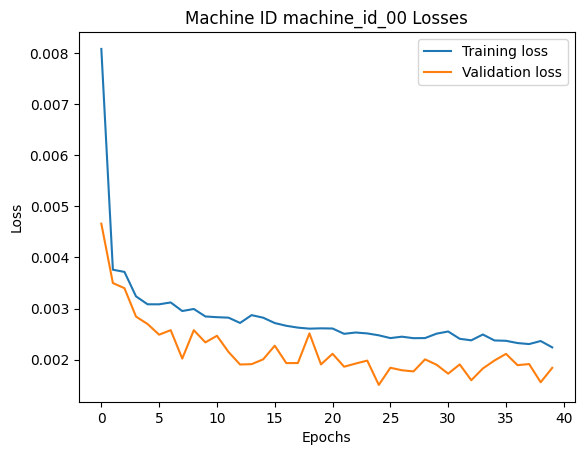

Validation Loss for Machine ID machine_id_00: Mean - 0.002177961022307104, Standard Deviation - 0.0005872723830931712
Training on fold 2/5 for Machine ID machine_id_00


Epoch 1 Validation: 100%|██████████| 46/46 [00:10<00:00,  4.38it/s]


Epoch 1 Train loss: 0.0089, Val loss: 0.0046
Validation loss decreased (inf --> 0.004637).  Saving model ...


Epoch 2 Validation: 100%|██████████| 46/46 [00:07<00:00,  6.50it/s]


Epoch 2 Train loss: 0.0038, Val loss: 0.0042
Validation loss decreased (0.004637 --> 0.004189).  Saving model ...


Epoch 3 Validation: 100%|██████████| 46/46 [00:10<00:00,  4.48it/s]


Epoch 3 Train loss: 0.0035, Val loss: 0.0033
Validation loss decreased (0.004189 --> 0.003326).  Saving model ...


Epoch 4 Validation: 100%|██████████| 46/46 [00:07<00:00,  6.31it/s]


Epoch 4 Train loss: 0.0033, Val loss: 0.0030
Validation loss decreased (0.003326 --> 0.003012).  Saving model ...


Epoch 5 Validation: 100%|██████████| 46/46 [00:09<00:00,  5.01it/s]


Epoch 5 Train loss: 0.0033, Val loss: 0.0031
EarlyStopping counter: 1 out of 15


Epoch 6 Validation: 100%|██████████| 46/46 [00:09<00:00,  4.91it/s]


Epoch 6 Train loss: 0.0031, Val loss: 0.0027
Validation loss decreased (0.003012 --> 0.002675).  Saving model ...


Epoch 7 Validation: 100%|██████████| 46/46 [00:07<00:00,  6.53it/s]


Epoch 7 Train loss: 0.0032, Val loss: 0.0027
EarlyStopping counter: 1 out of 15


Epoch 8 Validation: 100%|██████████| 46/46 [00:10<00:00,  4.37it/s]


Epoch 8 Train loss: 0.0030, Val loss: 0.0027
EarlyStopping counter: 2 out of 15


Epoch 9 Validation: 100%|██████████| 46/46 [00:07<00:00,  6.46it/s]


Epoch 9 Train loss: 0.0028, Val loss: 0.0034
EarlyStopping counter: 3 out of 15


Epoch 10 Validation: 100%|██████████| 46/46 [00:09<00:00,  4.84it/s]


Epoch 10 Train loss: 0.0029, Val loss: 0.0022
Validation loss decreased (0.002675 --> 0.002168).  Saving model ...


Epoch 11 Validation: 100%|██████████| 46/46 [00:09<00:00,  5.10it/s]


Epoch 11 Train loss: 0.0028, Val loss: 0.0035
EarlyStopping counter: 1 out of 15


Epoch 12 Validation: 100%|██████████| 46/46 [00:07<00:00,  6.24it/s]


Epoch 12 Train loss: 0.0027, Val loss: 0.0024
EarlyStopping counter: 2 out of 15


Epoch 13 Validation: 100%|██████████| 46/46 [00:10<00:00,  4.52it/s]


Epoch 13 Train loss: 0.0027, Val loss: 0.0026
EarlyStopping counter: 3 out of 15


Epoch 14 Validation: 100%|██████████| 46/46 [00:06<00:00,  6.62it/s]


Epoch 14 Train loss: 0.0027, Val loss: 0.0019
Validation loss decreased (0.002168 --> 0.001931).  Saving model ...


Epoch 15 Validation: 100%|██████████| 46/46 [00:10<00:00,  4.53it/s]


Epoch 15 Train loss: 0.0028, Val loss: 0.0035
EarlyStopping counter: 1 out of 15


Epoch 16 Validation: 100%|██████████| 46/46 [00:06<00:00,  6.81it/s]


Epoch 16 Train loss: 0.0027, Val loss: 0.0021
EarlyStopping counter: 2 out of 15


Epoch 17 Validation: 100%|██████████| 46/46 [00:10<00:00,  4.40it/s]


Epoch 17 Train loss: 0.0026, Val loss: 0.0018
Validation loss decreased (0.001931 --> 0.001784).  Saving model ...


Epoch 18 Validation: 100%|██████████| 46/46 [00:06<00:00,  6.58it/s]


Epoch 18 Train loss: 0.0026, Val loss: 0.0018
Validation loss decreased (0.001784 --> 0.001772).  Saving model ...


Epoch 19 Validation: 100%|██████████| 46/46 [00:09<00:00,  5.09it/s]


Epoch 19 Train loss: 0.0026, Val loss: 0.0023
EarlyStopping counter: 1 out of 15


Epoch 20 Validation: 100%|██████████| 46/46 [00:08<00:00,  5.32it/s]


Epoch 20 Train loss: 0.0024, Val loss: 0.0017
Validation loss decreased (0.001772 --> 0.001651).  Saving model ...


Epoch 21 Validation: 100%|██████████| 46/46 [00:07<00:00,  6.03it/s]


Epoch 21 Train loss: 0.0025, Val loss: 0.0021
EarlyStopping counter: 1 out of 15


Epoch 22 Validation: 100%|██████████| 46/46 [00:09<00:00,  4.79it/s]


Epoch 22 Train loss: 0.0025, Val loss: 0.0017
EarlyStopping counter: 2 out of 15


Epoch 23 Validation: 100%|██████████| 46/46 [00:07<00:00,  6.45it/s]


Epoch 23 Train loss: 0.0025, Val loss: 0.0021
EarlyStopping counter: 3 out of 15


Epoch 24 Validation: 100%|██████████| 46/46 [00:10<00:00,  4.39it/s]


Epoch 24 Train loss: 0.0025, Val loss: 0.0016
Validation loss decreased (0.001651 --> 0.001621).  Saving model ...


Epoch 25 Validation: 100%|██████████| 46/46 [00:06<00:00,  6.80it/s]


Epoch 25 Train loss: 0.0024, Val loss: 0.0020
EarlyStopping counter: 1 out of 15


Epoch 26 Validation: 100%|██████████| 46/46 [00:10<00:00,  4.48it/s]


Epoch 26 Train loss: 0.0025, Val loss: 0.0019
EarlyStopping counter: 2 out of 15


Epoch 27 Validation: 100%|██████████| 46/46 [00:06<00:00,  6.79it/s]


Epoch 27 Train loss: 0.0025, Val loss: 0.0016
Validation loss decreased (0.001621 --> 0.001592).  Saving model ...


Epoch 28 Validation: 100%|██████████| 46/46 [00:10<00:00,  4.53it/s]


Epoch 28 Train loss: 0.0025, Val loss: 0.0018
EarlyStopping counter: 1 out of 15


Epoch 29 Validation: 100%|██████████| 46/46 [00:07<00:00,  6.10it/s]


Epoch 29 Train loss: 0.0025, Val loss: 0.0024
EarlyStopping counter: 2 out of 15


Epoch 30 Validation: 100%|██████████| 46/46 [00:09<00:00,  5.06it/s]


Epoch 30 Train loss: 0.0025, Val loss: 0.0022
EarlyStopping counter: 3 out of 15


Epoch 31 Validation: 100%|██████████| 46/46 [00:08<00:00,  5.33it/s]


Epoch 31 Train loss: 0.0024, Val loss: 0.0023
EarlyStopping counter: 4 out of 15


Epoch 32 Validation: 100%|██████████| 46/46 [00:08<00:00,  5.70it/s]


Epoch 32 Train loss: 0.0024, Val loss: 0.0020
EarlyStopping counter: 5 out of 15


Epoch 33 Validation: 100%|██████████| 46/46 [00:09<00:00,  4.73it/s]


Epoch 33 Train loss: 0.0023, Val loss: 0.0018
EarlyStopping counter: 6 out of 15


Epoch 34 Validation: 100%|██████████| 46/46 [00:07<00:00,  6.44it/s]


Epoch 34 Train loss: 0.0024, Val loss: 0.0016
Validation loss decreased (0.001592 --> 0.001585).  Saving model ...


Epoch 35 Validation: 100%|██████████| 46/46 [00:09<00:00,  4.60it/s]


Epoch 35 Train loss: 0.0023, Val loss: 0.0016
Validation loss decreased (0.001585 --> 0.001551).  Saving model ...


Epoch 36 Validation: 100%|██████████| 46/46 [00:06<00:00,  6.82it/s]


Epoch 36 Train loss: 0.0025, Val loss: 0.0017
EarlyStopping counter: 1 out of 15


Epoch 37 Validation: 100%|██████████| 46/46 [00:10<00:00,  4.43it/s]


Epoch 37 Train loss: 0.0024, Val loss: 0.0019
EarlyStopping counter: 2 out of 15


Epoch 38 Validation: 100%|██████████| 46/46 [00:06<00:00,  6.69it/s]


Epoch 38 Train loss: 0.0024, Val loss: 0.0018
EarlyStopping counter: 3 out of 15


Epoch 39 Validation: 100%|██████████| 46/46 [00:10<00:00,  4.47it/s]


Epoch 39 Train loss: 0.0024, Val loss: 0.0018
EarlyStopping counter: 4 out of 15


Epoch 40 Validation: 100%|██████████| 46/46 [00:06<00:00,  6.85it/s]


Epoch 40 Train loss: 0.0023, Val loss: 0.0019
EarlyStopping counter: 5 out of 15


Epoch 41 Validation: 100%|██████████| 46/46 [00:09<00:00,  4.65it/s]


Epoch 41 Train loss: 0.0023, Val loss: 0.0018
EarlyStopping counter: 6 out of 15


Epoch 42 Validation: 100%|██████████| 46/46 [00:07<00:00,  6.05it/s]


Epoch 42 Train loss: 0.0023, Val loss: 0.0016
EarlyStopping counter: 7 out of 15


Epoch 43 Validation: 100%|██████████| 46/46 [00:08<00:00,  5.45it/s]


Epoch 43 Train loss: 0.0024, Val loss: 0.0016
EarlyStopping counter: 8 out of 15


Epoch 44 Validation: 100%|██████████| 46/46 [00:09<00:00,  5.10it/s]


Epoch 44 Train loss: 0.0023, Val loss: 0.0017
EarlyStopping counter: 9 out of 15


Epoch 45 Validation: 100%|██████████| 46/46 [00:07<00:00,  6.43it/s]


Epoch 45 Train loss: 0.0022, Val loss: 0.0022
EarlyStopping counter: 10 out of 15


Epoch 46 Validation: 100%|██████████| 46/46 [00:09<00:00,  4.78it/s]


Epoch 46 Train loss: 0.0023, Val loss: 0.0016
Validation loss decreased (0.001551 --> 0.001550).  Saving model ...


Epoch 47 Validation: 100%|██████████| 46/46 [00:06<00:00,  6.83it/s]


Epoch 47 Train loss: 0.0024, Val loss: 0.0016
EarlyStopping counter: 1 out of 15


Epoch 48 Validation: 100%|██████████| 46/46 [00:10<00:00,  4.50it/s]


Epoch 48 Train loss: 0.0023, Val loss: 0.0015
Validation loss decreased (0.001550 --> 0.001499).  Saving model ...


Epoch 49 Validation: 100%|██████████| 46/46 [00:07<00:00,  6.52it/s]


Epoch 49 Train loss: 0.0024, Val loss: 0.0018
EarlyStopping counter: 1 out of 15


Epoch 50 Validation: 100%|██████████| 46/46 [00:09<00:00,  4.65it/s]


Epoch 50 Train loss: 0.0023, Val loss: 0.0019
EarlyStopping counter: 2 out of 15


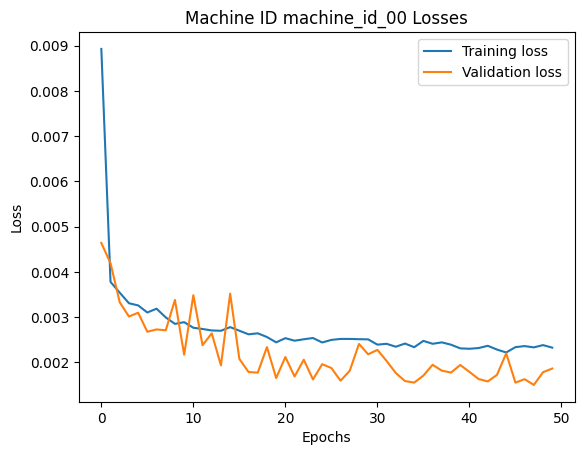

Validation Loss for Machine ID machine_id_00: Mean - 0.0022078082092997172, Standard Deviation - 0.0007051563382533233
Training on fold 3/5 for Machine ID machine_id_00


Epoch 1 Validation: 100%|██████████| 46/46 [00:07<00:00,  5.88it/s]


Epoch 1 Train loss: 0.0064, Val loss: 0.0035
Validation loss decreased (inf --> 0.003476).  Saving model ...


Epoch 2 Validation: 100%|██████████| 46/46 [00:08<00:00,  5.25it/s]


Epoch 2 Train loss: 0.0037, Val loss: 0.0048
EarlyStopping counter: 1 out of 15


Epoch 3 Validation: 100%|██████████| 46/46 [00:07<00:00,  5.85it/s]


Epoch 3 Train loss: 0.0035, Val loss: 0.0032
Validation loss decreased (0.003476 --> 0.003182).  Saving model ...


Epoch 4 Validation: 100%|██████████| 46/46 [00:08<00:00,  5.38it/s]


Epoch 4 Train loss: 0.0033, Val loss: 0.0034
EarlyStopping counter: 1 out of 15


Epoch 5 Validation: 100%|██████████| 46/46 [00:07<00:00,  5.75it/s]


Epoch 5 Train loss: 0.0032, Val loss: 0.0026
Validation loss decreased (0.003182 --> 0.002646).  Saving model ...


Epoch 6 Validation: 100%|██████████| 46/46 [00:08<00:00,  5.16it/s]


Epoch 6 Train loss: 0.0030, Val loss: 0.0031
EarlyStopping counter: 1 out of 15


Epoch 7 Validation: 100%|██████████| 46/46 [00:08<00:00,  5.56it/s]


Epoch 7 Train loss: 0.0029, Val loss: 0.0025
Validation loss decreased (0.002646 --> 0.002471).  Saving model ...


Epoch 8 Validation: 100%|██████████| 46/46 [00:07<00:00,  6.10it/s]


Epoch 8 Train loss: 0.0029, Val loss: 0.0024
Validation loss decreased (0.002471 --> 0.002406).  Saving model ...


Epoch 9 Validation: 100%|██████████| 46/46 [00:08<00:00,  5.28it/s]


Epoch 9 Train loss: 0.0029, Val loss: 0.0024
EarlyStopping counter: 1 out of 15


Epoch 10 Validation: 100%|██████████| 46/46 [00:07<00:00,  5.81it/s]


Epoch 10 Train loss: 0.0030, Val loss: 0.0022
Validation loss decreased (0.002406 --> 0.002217).  Saving model ...


Epoch 11 Validation: 100%|██████████| 46/46 [00:10<00:00,  4.53it/s]


Epoch 11 Train loss: 0.0027, Val loss: 0.0034
EarlyStopping counter: 1 out of 15


Epoch 12 Validation: 100%|██████████| 46/46 [00:06<00:00,  6.74it/s]


Epoch 12 Train loss: 0.0027, Val loss: 0.0024
EarlyStopping counter: 2 out of 15


Epoch 13 Validation: 100%|██████████| 46/46 [00:10<00:00,  4.43it/s]


Epoch 13 Train loss: 0.0026, Val loss: 0.0025
EarlyStopping counter: 3 out of 15


Epoch 14 Validation: 100%|██████████| 46/46 [00:06<00:00,  7.02it/s]


Epoch 14 Train loss: 0.0027, Val loss: 0.0019
Validation loss decreased (0.002217 --> 0.001906).  Saving model ...


Epoch 15 Validation: 100%|██████████| 46/46 [00:10<00:00,  4.59it/s]


Epoch 15 Train loss: 0.0027, Val loss: 0.0021
EarlyStopping counter: 1 out of 15


Epoch 16 Validation: 100%|██████████| 46/46 [00:07<00:00,  6.49it/s]


Epoch 16 Train loss: 0.0026, Val loss: 0.0037
EarlyStopping counter: 2 out of 15


Epoch 17 Validation: 100%|██████████| 46/46 [00:10<00:00,  4.45it/s]


Epoch 17 Train loss: 0.0026, Val loss: 0.0020
EarlyStopping counter: 3 out of 15


Epoch 18 Validation: 100%|██████████| 46/46 [00:06<00:00,  6.74it/s]


Epoch 18 Train loss: 0.0026, Val loss: 0.0018
Validation loss decreased (0.001906 --> 0.001782).  Saving model ...


Epoch 19 Validation: 100%|██████████| 46/46 [00:10<00:00,  4.48it/s]


Epoch 19 Train loss: 0.0026, Val loss: 0.0019
EarlyStopping counter: 1 out of 15


Epoch 20 Validation: 100%|██████████| 46/46 [00:07<00:00,  6.41it/s]


Epoch 20 Train loss: 0.0025, Val loss: 0.0022
EarlyStopping counter: 2 out of 15


Epoch 21 Validation: 100%|██████████| 46/46 [00:09<00:00,  4.93it/s]


Epoch 21 Train loss: 0.0024, Val loss: 0.0018
EarlyStopping counter: 3 out of 15


Epoch 22 Validation: 100%|██████████| 46/46 [00:09<00:00,  5.00it/s]


Epoch 22 Train loss: 0.0025, Val loss: 0.0021
EarlyStopping counter: 4 out of 15


Epoch 23 Validation: 100%|██████████| 46/46 [00:07<00:00,  6.05it/s]


Epoch 23 Train loss: 0.0024, Val loss: 0.0017
Validation loss decreased (0.001782 --> 0.001699).  Saving model ...


Epoch 24 Validation: 100%|██████████| 46/46 [00:10<00:00,  4.48it/s]


Epoch 24 Train loss: 0.0025, Val loss: 0.0017
Validation loss decreased (0.001699 --> 0.001677).  Saving model ...


Epoch 25 Validation: 100%|██████████| 46/46 [00:06<00:00,  6.86it/s]


Epoch 25 Train loss: 0.0025, Val loss: 0.0019
EarlyStopping counter: 1 out of 15


Epoch 26 Validation: 100%|██████████| 46/46 [00:10<00:00,  4.54it/s]


Epoch 26 Train loss: 0.0024, Val loss: 0.0019
EarlyStopping counter: 2 out of 15


Epoch 27 Validation: 100%|██████████| 46/46 [00:06<00:00,  6.67it/s]


Epoch 27 Train loss: 0.0025, Val loss: 0.0018
EarlyStopping counter: 3 out of 15


Epoch 28 Validation: 100%|██████████| 46/46 [00:10<00:00,  4.47it/s]


Epoch 28 Train loss: 0.0024, Val loss: 0.0019
EarlyStopping counter: 4 out of 15


Epoch 29 Validation: 100%|██████████| 46/46 [00:06<00:00,  6.60it/s]


Epoch 29 Train loss: 0.0024, Val loss: 0.0020
EarlyStopping counter: 5 out of 15


Epoch 30 Validation: 100%|██████████| 46/46 [00:10<00:00,  4.48it/s]


Epoch 30 Train loss: 0.0024, Val loss: 0.0020
EarlyStopping counter: 6 out of 15


Epoch 31 Validation: 100%|██████████| 46/46 [00:06<00:00,  6.71it/s]


Epoch 31 Train loss: 0.0024, Val loss: 0.0022
EarlyStopping counter: 7 out of 15


Epoch 32 Validation: 100%|██████████| 46/46 [00:10<00:00,  4.44it/s]


Epoch 32 Train loss: 0.0026, Val loss: 0.0020
EarlyStopping counter: 8 out of 15


Epoch 33 Validation: 100%|██████████| 46/46 [00:07<00:00,  5.81it/s]


Epoch 33 Train loss: 0.0025, Val loss: 0.0019
EarlyStopping counter: 9 out of 15


Epoch 34 Validation: 100%|██████████| 46/46 [00:08<00:00,  5.69it/s]


Epoch 34 Train loss: 0.0024, Val loss: 0.0019
EarlyStopping counter: 10 out of 15


Epoch 35 Validation: 100%|██████████| 46/46 [00:09<00:00,  5.01it/s]


Epoch 35 Train loss: 0.0024, Val loss: 0.0019
EarlyStopping counter: 11 out of 15


Epoch 36 Validation: 100%|██████████| 46/46 [00:07<00:00,  6.32it/s]


Epoch 36 Train loss: 0.0025, Val loss: 0.0021
EarlyStopping counter: 12 out of 15


Epoch 37 Validation: 100%|██████████| 46/46 [00:09<00:00,  4.63it/s]


Epoch 37 Train loss: 0.0024, Val loss: 0.0016
Validation loss decreased (0.001677 --> 0.001616).  Saving model ...


Epoch 38 Validation: 100%|██████████| 46/46 [00:06<00:00,  6.62it/s]


Epoch 38 Train loss: 0.0024, Val loss: 0.0017
EarlyStopping counter: 1 out of 15


Epoch 39 Validation: 100%|██████████| 46/46 [00:10<00:00,  4.44it/s]


Epoch 39 Train loss: 0.0023, Val loss: 0.0016
Validation loss decreased (0.001616 --> 0.001597).  Saving model ...


Epoch 40 Validation: 100%|██████████| 46/46 [00:06<00:00,  6.67it/s]


Epoch 40 Train loss: 0.0023, Val loss: 0.0017
EarlyStopping counter: 1 out of 15


Epoch 41 Validation: 100%|██████████| 46/46 [00:10<00:00,  4.52it/s]


Epoch 41 Train loss: 0.0024, Val loss: 0.0016
EarlyStopping counter: 2 out of 15


Epoch 42 Validation: 100%|██████████| 46/46 [00:06<00:00,  6.64it/s]


Epoch 42 Train loss: 0.0022, Val loss: 0.0018
EarlyStopping counter: 3 out of 15


Epoch 43 Training:  38%|███▊      | 70/183 [00:14<00:22,  5.01it/s]<ipython-input-10-a1041973cd72>:48: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(file_path, sr=None)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
Epoch 43 Training:  38%|███▊      | 70/183 [00:14<00:24,  4.68it/s]


FileNotFoundError: ignored

In [ ]:
from sklearn.model_selection import KFold


# 모델 저장 디렉토리 확인 및 생성
model_save_dir = 'models'
if not os.path.exists(model_save_dir):
    os.makedirs(model_save_dir)

# k-폴드 교차 검증 설정
k_folds = 5
kf = KFold(n_splits=k_folds, shuffle=True, random_state=2023)

models = {}
all_val_losses = []
machine_ids = ['machine_id_00']

# 각 machine_id에 대한 모델 훈련 및 검증
for machine_id in machine_ids:
    print(f'Starting k-fold training for Machine ID {machine_id}')

# 각 machine_id에 대한 폴드별 검증 손실
    val_losses_per_machine = []


    # 해당 machine_id의 train 파일 경로 수집
    train_files = [os.path.join(train_data_path, machine_id, 'train', file)
                   for file in os.listdir(os.path.join(train_data_path, machine_id, 'train'))]

    # 해당 machine_id의 train 데이터셋에서 min_val과 max_val 계산
    temp_dataset = AudioDataset(train_files)
    min_val, max_val = temp_dataset.calculate_min_max_values()

    # k-폴드 교차 검증
    for fold, (train_ids, val_ids) in enumerate(kf.split(train_files)):
        print(f"Training on fold {fold+1}/{k_folds} for Machine ID {machine_id}")

        # 훈련 및 검증 파일 분할
        train_subset = [train_files[i] for i in train_ids]
        val_subset = [train_files[i] for i in val_ids]

        # 데이터셋 인스턴스 생성
        train_dataset = AudioDataset(train_subset, min_val, max_val)
        val_dataset = AudioDataset(val_subset, min_val, max_val)

        # DataLoader 인스턴스 생성
        train_loader = DataLoader(train_dataset, batch_size=4, shuffle=True)
        val_loader = DataLoader(val_dataset, batch_size=4, shuffle=False)

        # 모델 초기화 및 훈련
        model = Autoencoder().to(device)  # 모델 인스턴스 생성
        model, val_loss_mean, val_loss_std = train_model(model, train_loader, val_loader, machine_id)
        val_losses_per_machine.append((val_loss_mean, val_loss_std))


        # 모델 저장
        model_save_path = f'{model_save_dir}/model_{machine_id}_fold_{fold}.pt'
        torch.save(model.state_dict(), model_save_path)
        model_save_dir = '/content/drive/My Drive/Capstone_Project/DCASE_challenge/fan'  # 구글 드라이브 내의 저장 경로로 변경
        models[f'{machine_id}_fold_{fold}'] = model_save_path

        # fold의 검증 손실 저장
        # val_losses_per_machine.append(val_losses)

    # 각 machine_id에 대한 평균과 표준 편차 계산
    avg_val_loss = np.mean([loss[0] for loss in val_losses_per_machine])
    std_val_loss = np.mean([loss[1] for loss in val_losses_per_machine])

    all_val_losses.append((machine_id, avg_val_loss, std_val_loss))

    print(f'Machine ID {machine_id} - 평균 검증 손실: {avg_val_loss}, 표준편차: {std_val_loss}')

# 모든 machine_id에 대한 결과 요약
for machine_id, avg_loss, std_loss in all_val_losses:
    print(f'Machine ID {machine_id} - 평균 검증 손실: {avg_loss}, 표준편차: {std_loss}')



In [ ]:
import os

directory_path = '/content/drive/MyDrive/Capstone_Project/DCASE_challenge/fan/train/machine_id_00/train/'
file_to_check = 'normal_id_00_00000426.wav' # 디렉토리 경로를 여기에 지정하세요

# 디렉토리 경로가 존재하는지 확인
if os.path.exists(directory_path) and os.path.isdir(directory_path):
    # 파일의 전체 경로 생성
    file_path = os.path.join(directory_path, file_to_check)

    # 파일이 존재하는지 확인
    if os.path.exists(file_path) and os.path.isfile(file_path):
        print(f"'{file_to_check}' 파일이 디렉토리에 존재합니다.")
    else:
        print(f"'{file_to_check}' 파일이 디렉토리에 존재하지 않습니다.")
else:
    print("입력한 경로가 유효한 디렉토리가 아닙니다.")

'normal_id_00_00000426.wav' 파일이 디렉토리에 존재합니다.
